>>># old BIkes price prediction project

In [1]:
from sklearn.ensemble import ExtraTreesRegressor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [3]:
df=pd.read_csv('Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [9]:
model=pickle.load(open('bike_price_prediction_97%_accuracy.pkl','rb'))

In [14]:
df=df.drop('bike_name',axis=1)
df.head(2)

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield


In [4]:
df['brand'].value_counts().keys().shape[0]            # 23 branded available her

23

In [5]:
df['city'].value_counts().keys().shape[0]          # 443 city record available 

443

In [6]:
df['owner'].value_counts()           # mostly four time usable bikes available

First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: owner, dtype: int64

In [7]:
df['city'].value_counts()

Delhi             7318
Bangalore         2723
Mumbai            2591
Hyderabad         2160
Pune              1724
                  ... 
Dibrugarh            1
Nawanshahr           1
Calicut              1
Chikkaballapur       1
Manali               1
Name: city, Length: 443, dtype: int64

In [8]:
grouped=df.groupby(by='city')

In [9]:
grouped.get_group('Delhi').shape          # bikes available in the delhi

(7318, 7)

In [10]:
grouped.get_group('Delhi')[grouped.get_group('Delhi')['age']<24].shape     # that are used in less than 24 year

(7314, 7)

In [11]:
grouped['brand'].value_counts()['Delhi'].keys()            # all brand available in Delhi 

Index(['Bajaj', 'Hero', 'Royal Enfield', 'Yamaha', 'TVS', 'Honda', 'Suzuki',
       'KTM', 'Harley-Davidson', 'Hyosung', 'Mahindra', 'Triumph', 'Benelli',
       'Kawasaki', 'Ducati', 'BMW', 'MV', 'Rajdoot'],
      dtype='object', name='brand')

In [12]:
grouped['owner'].value_counts()['Delhi']           # mostly first handed used bikes availabel in delhi

owner
First Owner             6516
Second Owner             787
Third Owner               13
Fourth Owner Or More       2
Name: owner, dtype: int64

In [13]:
print('minimim drived in kilometers :- ',grouped['kms_driven'].value_counts()['Delhi'].min(),'\n','maximum drived in kilometers :- ',grouped['kms_driven'].value_counts()['Delhi'].max())

minimim drived in kilometers :-  1 
 maximum drived in kilometers :-  655


In [14]:
grouped['brand'].value_counts().loc[['Delhi']]            # 1627 bullets avialable in delhi

city   brand          
Delhi  Bajaj              2290
       Hero               2094
       Royal Enfield      1627
       Yamaha              802
       TVS                 154
       Honda               124
       Suzuki               66
       KTM                  65
       Harley-Davidson      32
       Hyosung              15
       Mahindra             12
       Triumph              11
       Benelli               7
       Kawasaki              7
       Ducati                6
       BMW                   4
       MV                    1
       Rajdoot               1
Name: brand, dtype: int64

In [15]:
df[(df['city']=='Delhi') & (df['kms_driven']<=4000)].shape             # 176 bikes in delhi that are drived in only 176 kms

(176, 7)

In [16]:
df[(df['city']=='Delhi') & (df['kms_driven']<=4000)]['age'].value_counts()       # and mostly 3 year old bikes available in delhi
# that only driven 176 kms total bikes of amount 56

3.0     56
4.0     44
2.0     37
5.0     19
6.0      7
8.0      3
7.0      2
13.0     2
41.0     1
11.0     1
1.0      1
9.0      1
14.0     1
10.0     1
Name: age, dtype: int64

In [17]:
print('according to my condition availbale bullet in Delhi total numbers of bullet :- ',df[(df['city']=='Delhi') & (df['kms_driven']<=4000)&(df['age']<4)&(df['brand']=='Royal Enfield')].shape[0])

df[(df['city']=='Delhi') & (df['kms_driven']<=4000)&(df['age']<4)&(df['brand']=='Royal Enfield')]


according to my condition availbale bullet in Delhi total numbers of bullet :-  15


,price,city,kms_driven,owner,age,power,brand
479,150000.0,Delhi,4000.0,First Owner,2.0,350.0,Royal Enfield
871,175000.0,Delhi,2382.0,First Owner,2.0,350.0,Royal Enfield
1226,151000.0,Delhi,1500.0,First Owner,3.0,350.0,Royal Enfield
1760,172000.0,Delhi,3800.0,First Owner,2.0,350.0,Royal Enfield
3166,160000.0,Delhi,1189.0,First Owner,2.0,350.0,Royal Enfield
4145,160000.0,Delhi,1189.0,First Owner,2.0,350.0,Royal Enfield
6101,114000.0,Delhi,1661.0,First Owner,3.0,350.0,Royal Enfield
6110,150900.0,Delhi,1500.0,First Owner,3.0,410.0,Royal Enfield
6730,114000.0,Delhi,1661.0,First Owner,3.0,350.0,Royal Enfield
7082,150900.0,Delhi,1500.0,First Owner,3.0,410.0,Royal Enfield


In [18]:
df[(df['city']=='Delhi') & (df['kms_driven']<=4000)&(df['age']<4)&(df['brand']=='Royal Enfield')].sort_values(by ='price')


,price,city,kms_driven,owner,age,power,brand
6101,114000.0,Delhi,1661.0,First Owner,3.0,350.0,Royal Enfield
6730,114000.0,Delhi,1661.0,First Owner,3.0,350.0,Royal Enfield
8302,120000.0,Delhi,2172.0,First Owner,3.0,350.0,Royal Enfield
479,150000.0,Delhi,4000.0,First Owner,2.0,350.0,Royal Enfield
6110,150900.0,Delhi,1500.0,First Owner,3.0,410.0,Royal Enfield
7082,150900.0,Delhi,1500.0,First Owner,3.0,410.0,Royal Enfield
1226,151000.0,Delhi,1500.0,First Owner,3.0,350.0,Royal Enfield
3166,160000.0,Delhi,1189.0,First Owner,2.0,350.0,Royal Enfield
4145,160000.0,Delhi,1189.0,First Owner,2.0,350.0,Royal Enfield
1760,172000.0,Delhi,3800.0,First Owner,2.0,350.0,Royal Enfield


In [15]:
df[(df['city']=='Delhi') & (df['kms_driven']<=4000)&(df['age']<4)&(df['brand']=='Royal Enfield')][['power']]

,power
479,350.0
871,350.0
1226,350.0
1760,350.0
3166,350.0
4145,350.0
6101,350.0
6110,410.0
6730,350.0
7082,410.0


### maximum powerfull bullete according to my condition

In [20]:
df[(df['city']=='Delhi') & (df['kms_driven']<=4000)&(df['age']<4)&(df['brand']=='Royal Enfield')][['power']].max().values[0]

500.0

### price of most powerfull bullets in delhi

In [21]:
df[(df['city']=='Delhi') & (df['kms_driven']<=4000)&(df['age']<4)&(df['brand']=='Royal Enfield')][['power','price']].sort_values(by='power',ascending=False).head(4)

,power,price
7694,500.0,215000.0
7706,500.0,215000.0
8229,500.0,195000.0
8366,500.0,195000.0


<Figure size 720x864 with 0 Axes>

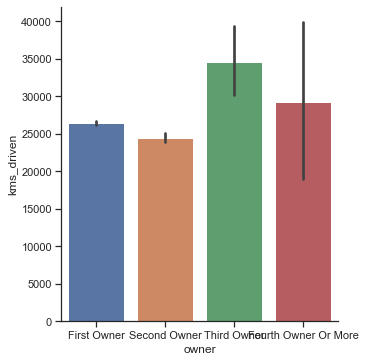

In [22]:

# sns.set(rc={'figure.figsize':(10,25)})
plt.figure(figsize=(10,12))
sns.set(style='ticks')
sns.catplot(x='owner',y='kms_driven',data=df,kind='bar')

In [23]:
df['owner'].value_counts().keys()

Index(['First Owner', 'Second Owner', 'Third Owner', 'Fourth Owner Or More'], dtype='object')

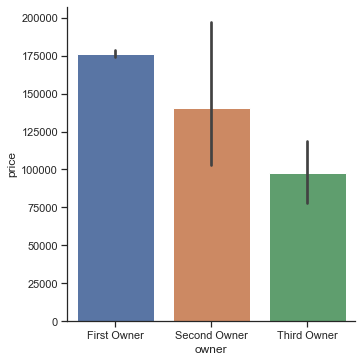

In [24]:
sns.catplot(x='owner',y='price',kind='bar',data=df.query("brand=='KTM'"))   # for ktm bike

<AxesSubplot:xlabel='owner', ylabel='count'>

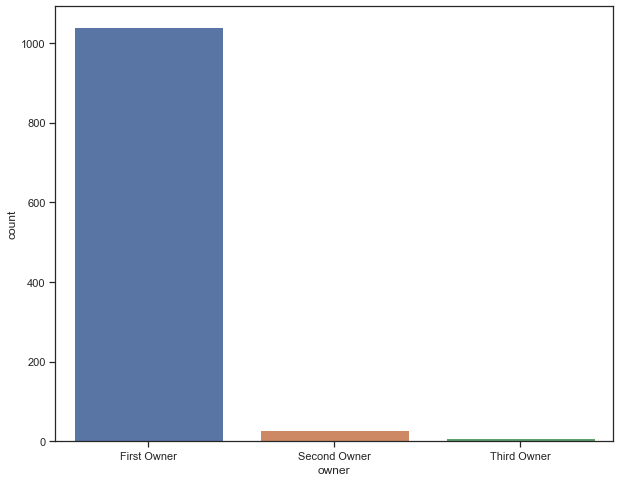

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x='owner',data=df.query("brand=='KTM'"))

In [26]:
ktm_set=df[df['brand']=='KTM']

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 85.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


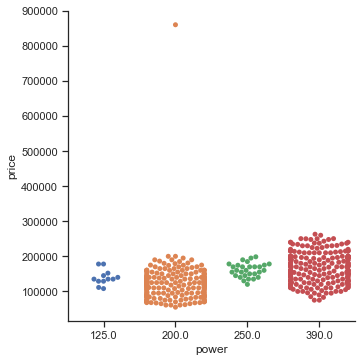

In [27]:
sns.catplot(x='power',y='price',data=ktm_set,kind='swarm')  # i got a outliere very danger outlier present in ktm+dataset

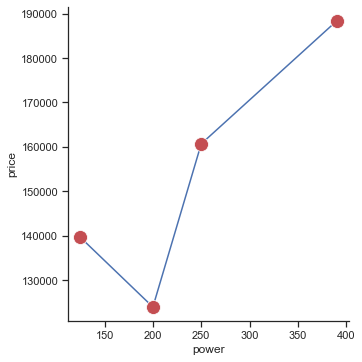

In [28]:
sns.relplot(x='power',y='price',data=ktm_set,kind='line',marker='o',ms=14,mfc='r',ci=None)

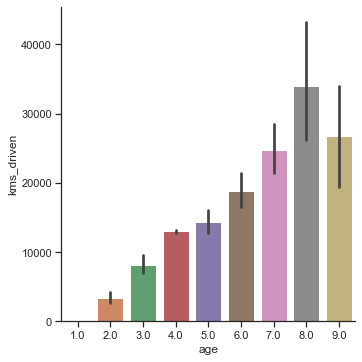

In [29]:
sns.catplot(x='age',y='kms_driven',data=ktm_set,kind='bar')

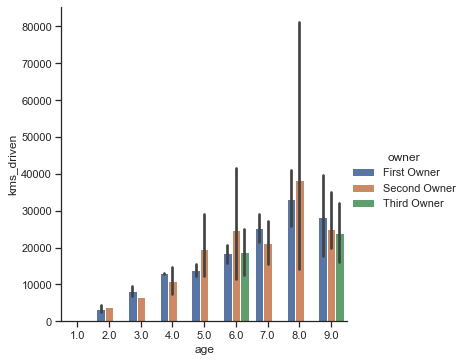

In [30]:
# sns.set(rc={'figure.figsize':(10,10)})
# plt.figure(figsize=(10,10))
sns.catplot(x='age',y='kms_driven',data=ktm_set,kind='bar',hue='owner')
# this chart is showing  very helpfull insights

## data cleaning 

In [16]:
df['age']=df['age'].astype(int)

In [17]:
df['age'].dtypes

dtype('int32')

In [18]:
dic={'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth Owner Or More':4}
df['owner']=df['owner'].map(dic)

In [19]:
df['owner']

0        1
1        1
2        1
3        1
4        1
        ..
32643    1
32644    1
32645    1
32646    1
32647    1
Name: owner, Length: 32648, dtype: int64

In [20]:
df['owner'].value_counts()

1    29964
2     2564
3      108
4       12
Name: owner, dtype: int64

In [21]:
ser=df['city'].value_counts()
ser[ser>10].keys()

Index(['Delhi', 'Bangalore', 'Mumbai', 'Hyderabad', 'Pune', 'Chennai',
       'Lucknow', 'Jaipur', 'Ghaziabad', 'Ahmedabad', 'Noida', 'Bhopal',
       'Gautam Buddha Nagar', 'Kanchipuram', 'Jodhpur', 'Karnal', 'Allahabad',
       'Rupnagar', 'Gurgaon', 'Godhara', 'Faridabad', 'Perumbavoor', 'Kadapa',
       'Ludhiana', 'Kolkata', 'Thane', 'Jhansi', 'Vadodara', 'Surat',
       'Jalandhar', 'Chandigarh', 'Rajkot', 'Indore', 'Dehradun', 'Patna',
       'Nagpur', 'Navi Mumbai', 'Coimbatore', 'Tiruvallur', 'Guwahati',
       'Bhubaneshwar', 'Howrah', 'Kanpur', 'Aurangabad', 'Cuttack',
       'Visakhapatnam', 'Alibag', 'Alipore', 'Ranchi', 'Nashik', 'Kalyan',
       'Udaipur', 'Rohtak', 'Gorakhpur', 'Agra', 'Kota', 'Meerut', 'Ernakulam',
       'Gandhinagar', '24 Pargana'],
      dtype='object')

In [22]:
city_name=['Delhi', 'Bangalore', 'Mumbai', 'Hyderabad', 'Pune', 'Chennai',
       'Lucknow', 'Jaipur', 'Ghaziabad', 'Ahmedabad', 'Noida', 'Bhopal',
       'Gautam Buddha Nagar', 'Kanchipuram', 'Jodhpur', 'Karnal', 'Allahabad',
       'Rupnagar', 'Gurgaon', 'Godhara', 'Faridabad', 'Perumbavoor', 'Kadapa',
       'Ludhiana', 'Kolkata', 'Thane', 'Jhansi', 'Vadodara', 'Surat',
       'Jalandhar', 'Chandigarh', 'Rajkot', 'Indore', 'Dehradun', 'Patna',
       'Navi Mumbai', 'Nagpur', 'Coimbatore', 'Guwahati', 'Tiruvallur',
       'Bhubaneshwar', 'Howrah', 'Kanpur', 'Aurangabad', 'Cuttack',
       'Visakhapatnam', 'Alibag', 'Alipore', 'Nashik', 'Ranchi', 'Kalyan',
       'Rohtak', 'Udaipur', 'Gorakhpur', 'Agra', 'Kota', '24 Pargana',
       'Meerut', 'Gandhinagar', 'Ernakulam']
df2=df[df['city'].isin(city_name)]
df2.head() 
# these are all city data that having at least 10 bikes

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,TVS
1,119900.0,Delhi,11000.0,1,4,350.0,Royal Enfield
2,600000.0,Delhi,110.0,1,8,675.0,Triumph
3,65000.0,Bangalore,16329.0,1,4,180.0,TVS
4,80000.0,Bangalore,10000.0,1,3,150.0,Yamaha


In [23]:
df2['city'].value_counts().shape              # total 60 city available in my data

(60,)

In [24]:
bikes_name=df2['brand'].value_counts()
most_available_bikes=bikes_name[bikes_name>10].keys()
df3=df2[df2['brand'].isin(most_available_bikes)]
df3.head()
# these are all bikes records that available numbers of greater than 10

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,TVS
1,119900.0,Delhi,11000.0,1,4,350.0,Royal Enfield
2,600000.0,Delhi,110.0,1,8,675.0,Triumph
3,65000.0,Bangalore,16329.0,1,4,180.0,TVS
4,80000.0,Bangalore,10000.0,1,3,150.0,Yamaha


In [25]:
df3.shape

(31679, 7)

In [26]:
bike_encoding_dict={'Bajaj':3, 'Hero':16, 'Royal Enfield':1, 'Yamaha':5, 'Honda':6, 'Suzuki':7, 'TVS':8,
       'KTM':2, 'Harley-Davidson':4, 'Kawasaki':9, 'Hyosung':10, 'Benelli':11, 'Mahindra':12,
       'Triumph':13, 'Ducati':14, 'BMW':15}
df3['brand']=df3['brand'].map(bike_encoding_dict)
df3.head()

<ipython-input-26-ff8ee0b0c430>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['brand']=df3['brand'].map(bike_encoding_dict)


,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,8
1,119900.0,Delhi,11000.0,1,4,350.0,1
2,600000.0,Delhi,110.0,1,8,675.0,13
3,65000.0,Bangalore,16329.0,1,4,180.0,8
4,80000.0,Bangalore,10000.0,1,3,150.0,5


# find the outliers in my dataset

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='power'>

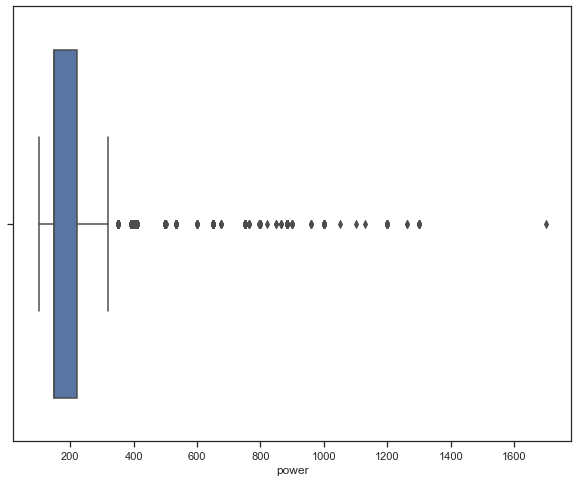

In [127]:
sns.boxplot(df3['power'])

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

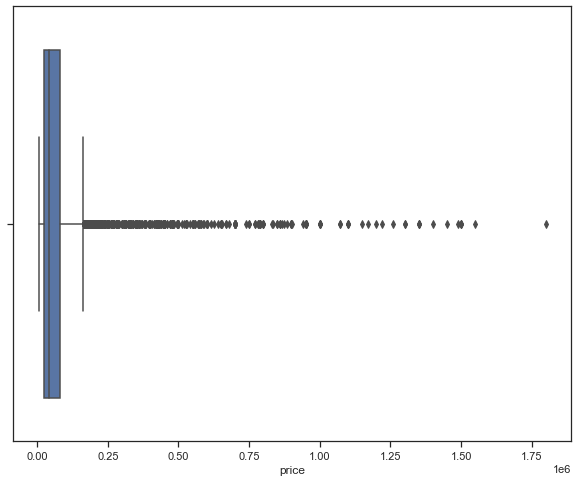

In [128]:
sns.boxplot(df3['price'])

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kms_driven'>

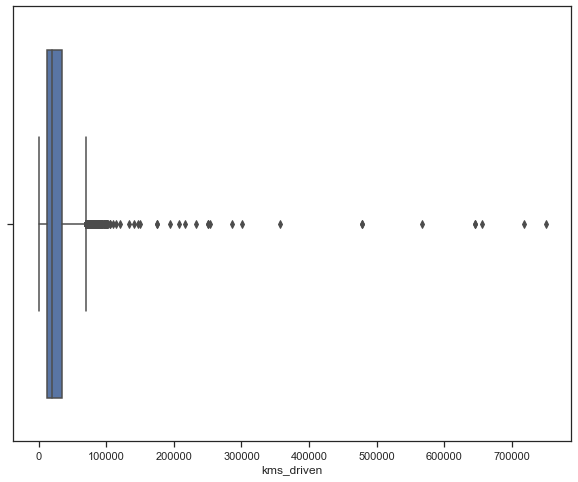

In [129]:
sns.boxplot(df3['kms_driven'])

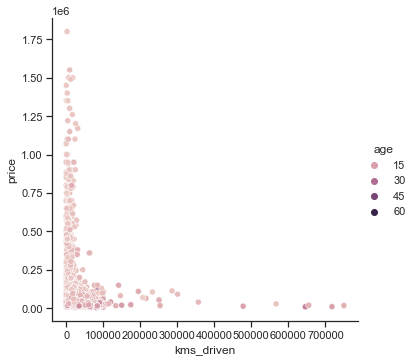

In [130]:
sns.relplot(x='kms_driven',y='price',data=df3,hue='age')

In [27]:
q1,q3=df3['kms_driven'].quantile([.25,.75])
IQR=q3-q1
LL=q1-1.5*(IQR)
uL=q3+1.5*(IQR)

In [28]:
LL

-22500.0

In [29]:
uL

69500.0

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kms_driven'>

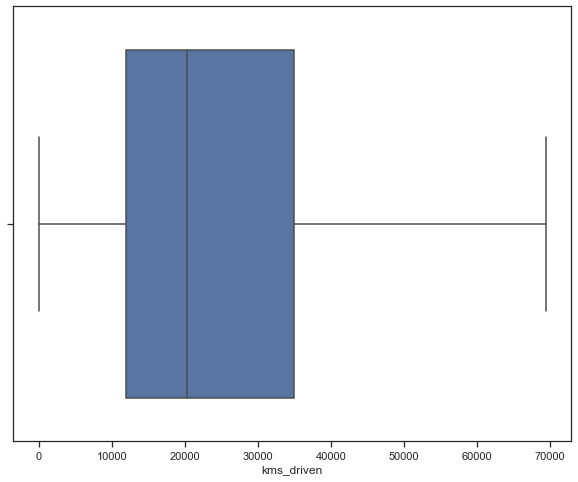

In [132]:
sns.boxplot(df3[df3['kms_driven']<uL]['kms_driven'])

In [30]:
df4_rm_outlrs_in_driven=df3[df3['kms_driven']<uL]
df4_rm_outlrs_in_driven.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,8
1,119900.0,Delhi,11000.0,1,4,350.0,1
2,600000.0,Delhi,110.0,1,8,675.0,13
3,65000.0,Bangalore,16329.0,1,4,180.0,8
4,80000.0,Bangalore,10000.0,1,3,150.0,5


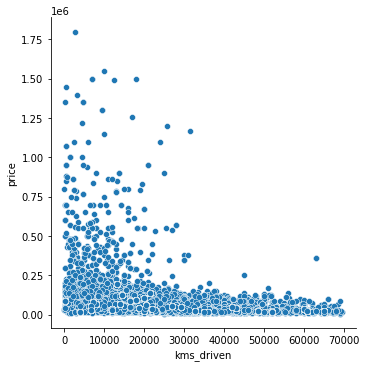

In [31]:
sns.relplot(x='kms_driven',y='price',data=df4_rm_outlrs_in_driven)
# you can see now

In [32]:
df4_rm_outlrs_in_driven.shape

(30825, 7)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

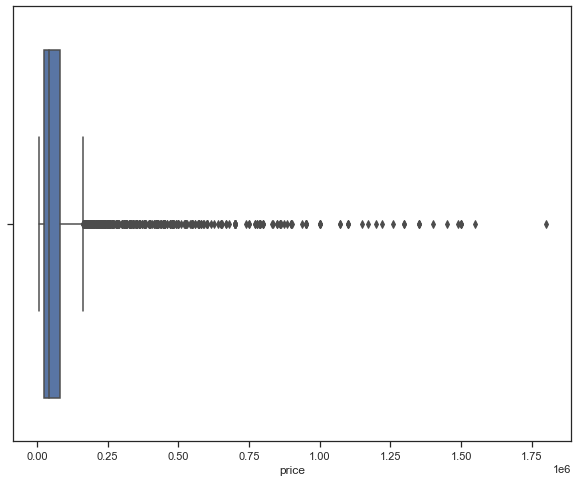

In [134]:
sns.boxplot(df4_rm_outlrs_in_driven['price'])
# i am going to remove outliers in price feature

In [33]:
q1,q3=df4_rm_outlrs_in_driven['price'].quantile([.25,.75])
IQR=q3-q1
LL=q1-1.5*(IQR)
UL=q3+1.5*(IQR)

In [34]:
LL

-57500.0

In [35]:
UL

162500.0

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

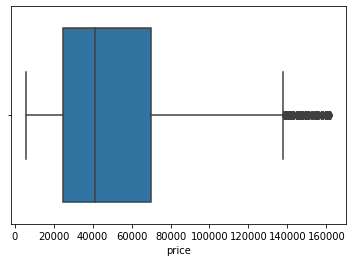

In [36]:
sns.boxplot(df4_rm_outlrs_in_driven[df4_rm_outlrs_in_driven['price']<UL]['price'])

In [37]:
df5=df4_rm_outlrs_in_driven[df4_rm_outlrs_in_driven['price']<UL]
df5.head()

,price,city,kms_driven,owner,age,power,brand
0,35000.0,Ahmedabad,17654.0,1,3,110.0,8
1,119900.0,Delhi,11000.0,1,4,350.0,1
3,65000.0,Bangalore,16329.0,1,4,180.0,8
4,80000.0,Bangalore,10000.0,1,3,150.0,5
5,53499.0,Delhi,25000.0,1,6,150.0,5


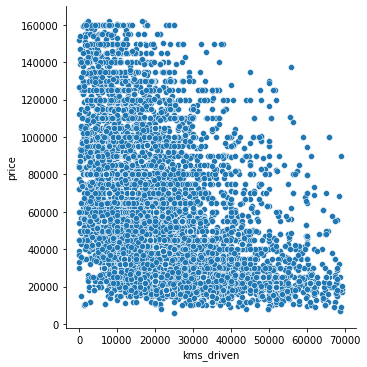

In [38]:
sns.relplot(x='kms_driven',y='price',data=df5)

<AxesSubplot:xlabel='kms_driven', ylabel='price'>

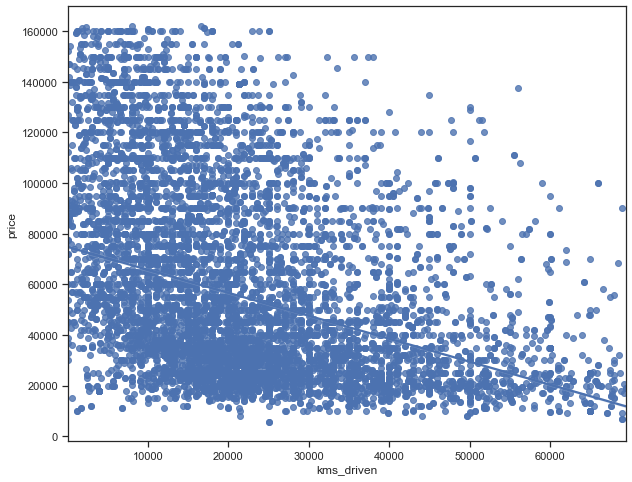

In [126]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set(style='ticks')
sns.regplot(x='kms_driven',y='price',data=df5)

In [39]:
df5.corr()

,price,kms_driven,owner,age,power,brand
price,1.000000,-0.451613,-0.050510,-0.608025,0.791132,-0.464816
kms_driven,-0.451613,1.000000,-0.022804,0.461666,-0.191330,-0.012560
owner,-0.050510,-0.022804,1.000000,0.325544,0.102824,0.010640
age,-0.608025,0.461666,0.325544,1.000000,-0.285234,0.231002
power,0.791132,-0.191330,0.102824,-0.285234,1.000000,-0.595623
brand,-0.464816,-0.012560,0.010640,0.231002,-0.595623,1.000000


<AxesSubplot:>

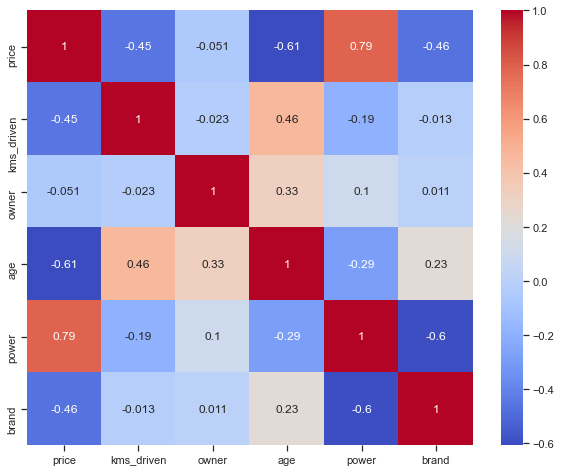

In [140]:
sns.heatmap(df5.corr(),annot=True,cmap='coolwarm')

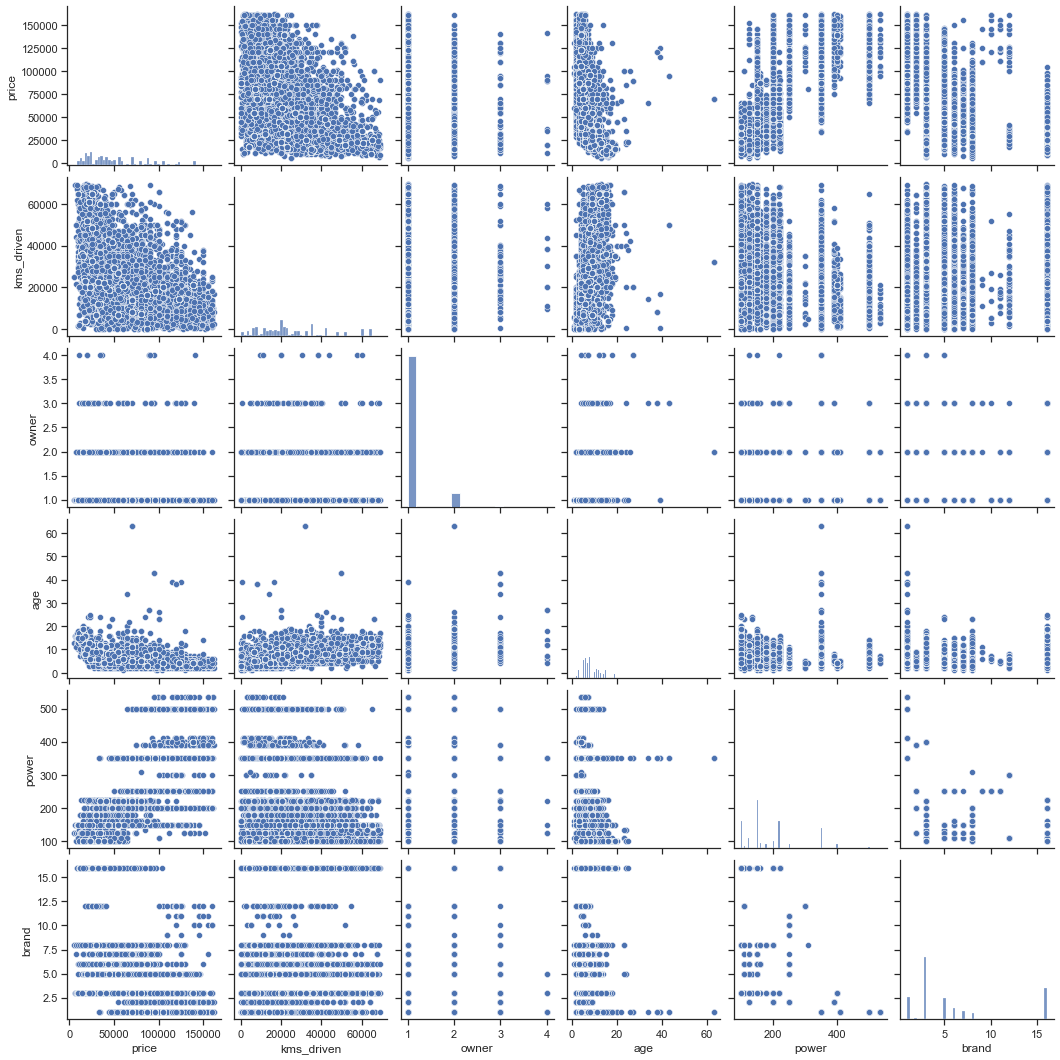

In [142]:
sns.pairplot(df5)

## set the variable for ML model

In [40]:
x=df5.drop(columns=['city','price'])
y=df5[['price']]

In [42]:
x.head()

,kms_driven,owner,age,power,brand
0,17654.0,1,3,110.0,8
1,11000.0,1,4,350.0,1
3,16329.0,1,4,180.0,8
4,10000.0,1,3,150.0,5
5,25000.0,1,6,150.0,5


In [43]:
x['kms_driven'].mean()

25637.80419942077

In [44]:
x['kms_driven'].min()

1.0

In [45]:
x['kms_driven'].max()

69415.0

In [52]:
x['power'].value_counts()

150.0    8521
100.0    4899
220.0    4779
350.0    3545
125.0    1785
200.0    1239
160.0     921
180.0     794
250.0     758
400.0     712
110.0     384
500.0     277
135.0     120
390.0     106
223.0      77
410.0      44
535.0      20
300.0      19
149.0       3
310.0       1
Name: power, dtype: int64

In [148]:
df5.shape

(29004, 7)

In [56]:
x.shape,y.shape

((29004, 5), (29004, 1))

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=31)

In [150]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((23203, 5), (5801, 5), (23203, 1), (5801, 1))

In [152]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8006829494196628

In [153]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_test,y_test)

0.8006829111272524

In [154]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_test,y_test)

0.8006829936667712

In [155]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_test,y_test)

0.9568882215524305

In [156]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_test,y_test)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-0.060628221002130944

In [157]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9042927771996112

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_test,y_test)

<ipython-input-58-e3516681500d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train,y_train)


0.9704897736172297

In [179]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr.score(x_test,y_test)

<ipython-input-179-2dc265c29587>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etr.fit(x_train,y_train)


0.9694005597846957

# with scaled data 

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train)
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [161]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_sc,y_train)
lr.score(x_test_sc,y_test)

0.8006829494196629

In [162]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train_sc,y_train)
ls.score(x_test_sc,y_test)

0.8006827325299593

In [167]:
from sklearn.linear_model import Ridge
rdg=Ridge()
rdg.fit(x_train_sc,y_train)
rdg.score(x_test_sc,y_test)

0.8006829662167803

In [163]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train_sc,y_train)
dtr.score(x_test_sc,y_test)

0.9577648952583957

In [164]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train_sc,y_train)
svr.score(x_test_sc,y_test)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.028168752879005776

In [165]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train_sc,y_train)
knn.score(x_test_sc,y_test)

0.9610930352901891

In [60]:
from sklearn.ensemble import RandomForestRegressor
rfr2=RandomForestRegressor()
rfr2.fit(x_train_sc,y_train)
rfr2.score(x_test_sc,y_test)

<ipython-input-60-4cedd03652f8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr2.fit(x_train_sc,y_train)


0.9699418803266026

In [180]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train_sc,y_train)
etr.score(x_test_sc,y_test)

<ipython-input-180-fabf29d4ac57>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etr.fit(x_train_sc,y_train)


0.9692048757761536

# you can see here all accuracy of algorithium

In [181]:
acuracy=pd.DataFrame({'Algorithium':['linear','laso','ridge','decisionTree','KNN','SVR','RandomForest','ETR'],
                     'acuracy_no_scl':[8006,8006,8006,9568,9042,-0.060,9694,9694],
                     'accuracy_with_scl':[8006,8006,8006,9577,9610,.0281,9701,9692]})
acuracy.sort_values(by='accuracy_with_scl',ascending=False)

,Algorithium,acuracy_no_scl,accuracy_with_scl
6,RandomForest,9694.00,9701.0000
7,ETR,9694.00,9692.0000
4,KNN,9042.00,9610.0000
3,decisionTree,9568.00,9577.0000
0,linear,8006.00,8006.0000
1,laso,8006.00,8006.0000
2,ridge,8006.00,8006.0000
5,SVR,-0.06,0.0281


# HYPER PARAMETER TUNING
hypere parametere just for undertanding , because i have already good accuracy

In [171]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
RandomForestRegressor()

In [185]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=500,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=5,stop=3,num=6)]
min_samples_split=[2,5,10,12,100]
min_samples_leaf=[1,2,5,10]

In [188]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [189]:
rdm_rand_forest=RandomizedSearchCV(estimator=rfr2,param_distributions=random_grid,n_iter=10,cv=5,verbose=2,scoring='neg_mean_squared_error')

In [190]:
rdm_rand_forest.fit(x_train_sc,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=12, n_estimators=318; total time=   2.8s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=12, n_estimators=318; total time=   2.6s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=12, n_estimators=318; total time=   2.7s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=12, n_estimators=318; total time=   2.6s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=12, n_estimators=318; total time=   2.6s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=172; total time=   1.2s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=172; total time=   1.2s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=172; total time=   1.3s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=172; total time=   1.2s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=172; total time=   1.3s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=354; total time=   2.9s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=354; total time=   2.9s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=354; total time=   2.9s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=354; total time=   3.2s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=354; total time=   3.8s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=500; total time=   2.9s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=500; total time=   2.3s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=500; total time=   3.0s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=500; total time=   2.5s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=500; total time=   2.3s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=172; total time=   1.4s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=172; total time=   1.4s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=172; total time=   1.4s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=172; total time=   1.4s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=172; total time=   1.4s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=354; total time=   2.5s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=354; total time=   2.4s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=354; total time=   2.5s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=354; total time=   2.5s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=354; total time=   2.5s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=390; total time=   3.8s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=390; total time=   3.7s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=390; total time=   3.7s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=390; total time=   3.7s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=390; total time=   3.7s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=354; total time=   1.6s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=354; total time=   1.6s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=354; total time=   1.6s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=354; total time=   1.6s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=12, n_estimators=354; total time=   1.6s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=12, n_estimators=245; total time=   2.3s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=12, n_estimators=245; total time=   2.0s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=12, n_estimators=245; total time=   2.0s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=12, n_estimators=245; total time=   2.5s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=10, min_samples_split=12, n_estimators=245; total time=   2.6s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=209; total time=   2.1s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=209; total time=   2.4s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=209; total time=   2.0s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=209; total time=   1.7s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=209; total time=   1.7s


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 4, 4, 3, 3, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 12,
                                                              100],
                                        'n_estimators': [100, 136, 172, 209,
                                                         245, 281, 318, 354,
                                                         390, 427, 463, 500]},
                   scoring='neg_mean_squared_error', verbose=2)

In [63]:
y_pred=rfr2.predict(x_test_sc)
y_pred

array([123000.,  41000.,  55000., ...,  22000.,  55005.,  32000.])

# model testing 

In [61]:
rfr2.score(x_test_sc,y_test)         #     this is my best model
# randomforest with scaled dataa

0.9699418803266026

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9699418803266026

In [65]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

36005813.08726671

In [66]:
np.sqrt(mse)

6000.484404384925

In [67]:
from sklearn.model_selection import cross_val_score
cross_validation=cross_val_score(rfr2,x_train,y_train)
print('cross validation value :- ',cross_validation)
print()
print(cross_validation.mean)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\dell\appdata\local\programs\python\py

cross validation value :-  [0.96553529 0.96806312 0.97071516 0.96422045 0.96812097]

<built-in method mean of numpy.ndarray object at 0x0000025D0FEB9DB0>


In [68]:
cross_validation.mean()         # cross validation mean average score

0.9673309987598697

In [214]:
y_pred

array([123000.,  41000.,  55000., ...,  22000.,  55005.,  32000.])

In [72]:
y_pred2=rfr.predict(x_test)

In [73]:
y_test['predicted_value_without_scl']=y_pred2

<ipython-input-73-59d45f2a2c78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['predicted_value_without_scl']=y_pred2


In [74]:
y_test

,price,predicted_value,predicted_value_without_scl
17856,123000.0,123000.0,123000.0
19588,41000.0,41000.0,41000.0
25791,55000.0,55000.0,55000.0
6401,75000.0,107693.0,106245.0
17820,10000.0,10000.0,10000.0
...,...,...,...
19824,32000.0,32000.0,32000.0
27216,20000.0,20000.0,20000.0
17580,22000.0,22000.0,22000.0
25602,55005.0,55005.0,55005.0


# superb 😄😄😃😁😎😎 you can see now my model is absolute good 

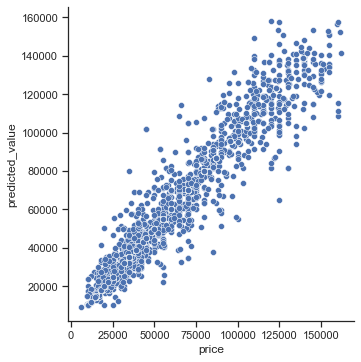

In [219]:
sns.relplot(x='price',y='predicted_value',data=y_test)

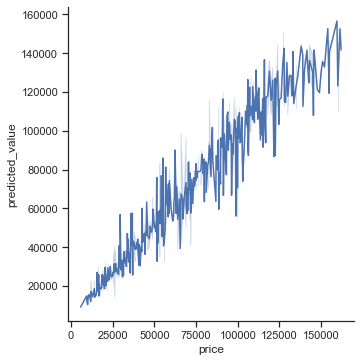

In [220]:
sns.relplot(x='price',y='predicted_value',data=y_test,kind='line')

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

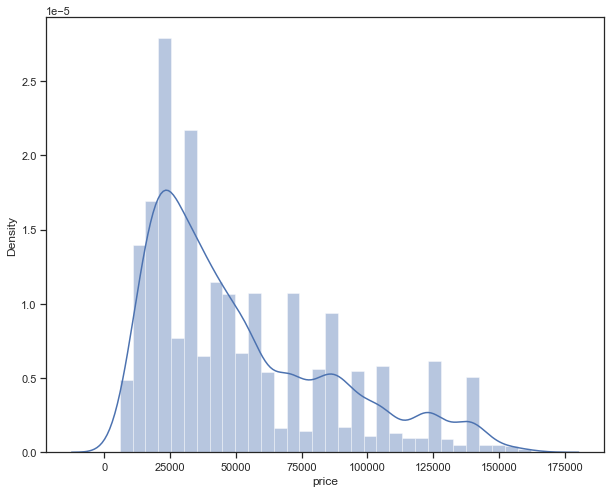

In [221]:
sns.distplot(y_test['price'])

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='predicted_value', ylabel='Density'>

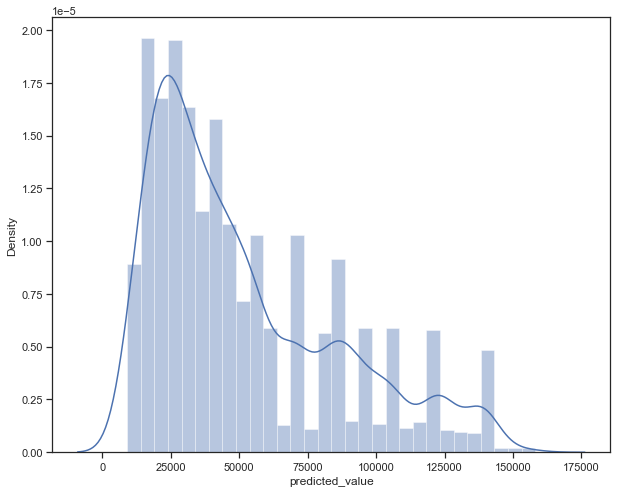

In [222]:
sns.distplot(y_test['predicted_value'])

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'There is no difference ')

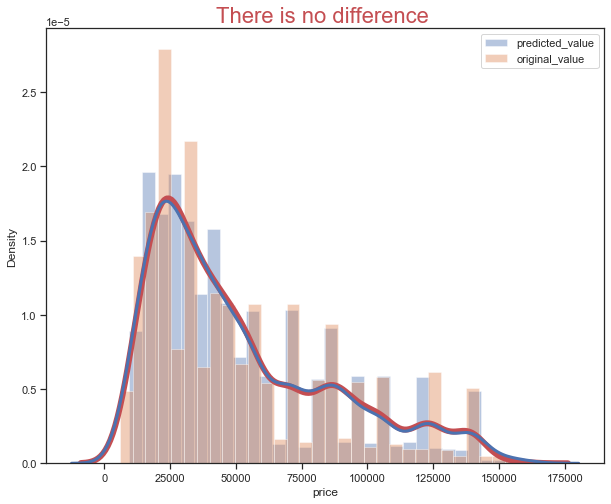

In [228]:
sns.distplot(y_test['predicted_value'],kde_kws={'lw':6,'color':'r'},label=['predicted_value'])
sns.distplot(y_test['price'],kde_kws={'lw':3,'color':'b'},label=['original_value'])
plt.legend()
plt.title('There is no difference ',fontsize=22,color='r')

# SAVE THE MODEL

In [1]:
import pickle

In [75]:
pickle.dump(rfr,open('bike_price_prediction.pkl','wb'))

In [2]:
model2=pickle.load(open('bike_price_prediction.pkl','rb'))

C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Ranjit Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.24.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
prediction=model2.predict([[2500,2,3,25,1]])

In [4]:
prediction

array([138550.])

In [7]:
str(round(prediction[0],2))

'138550.0'

In [4]:
model2.predict([[11000,1,4,350,1]])

array([130010.77380952])

# THANK YOU ✌🤞🌹✌🤞😎